# Loading the database and exploring the data
https://www.kaggle.com/msambare/fer2013


In [15]:
#Let's explore the data
import os
path="train/"
folders=os.listdir(path)
print(folders)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [16]:
import matplotlib.pyplot as plt
import os
from datetime import datetime
import numpy as np


now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

label_list=[] # save the emotion label  [0 'angry', 1'disgust', 2'fear', 3'happy', 4'neutral', 5'sad', 6'surprise']
imgs=[] #save the images

for i in range(len(folders)):
    path_emotion=path+folders[i]
    filenames=sorted(os.listdir(path_emotion))      
    #print("..................")
    #print(filenames)
    for j in range(len(filenames)):
        label_list.append(i)
        img=plt.imread(path_emotion+"/"+filenames[j])
        imgs.append(img)
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 22:55:43
Current Time = 22:55:58


In [17]:
imgs_np=np.array(imgs)
imgs_np.shape

(28708, 48, 48)

In [18]:
label_np=np.array(label_list)

label_np.shape
#os.remove("train/angry/Training_10131352.jpg") #removing the black image

(28708,)

angry
train/angry/Training_10295477.jpg
train/angry/Training_10315441.jpg
train/angry/Training_10316849.jpg
train/angry/Training_10333072.jpg
train/angry/Training_10334355.jpg
disgust
train/disgust/Training_11732399.jpg
train/disgust/Training_11753994.jpg
train/disgust/Training_11871637.jpg
train/disgust/Training_11946126.jpg
train/disgust/Training_12026955.jpg
fear
train/fear/Training_1018372.jpg
train/fear/Training_10208260.jpg
train/fear/Training_10230640.jpg
train/fear/Training_10247565.jpg
train/fear/Training_10283876.jpg
happy
train/happy/Training_10127474.jpg
train/happy/Training_10133389.jpg
train/happy/Training_10139297.jpg
train/happy/Training_10142161.jpg
train/happy/Training_10142426.jpg
neutral
train/neutral/Training_10083265.jpg
train/neutral/Training_10088257.jpg
train/neutral/Training_10133788.jpg
train/neutral/Training_10169962.jpg
train/neutral/Training_1017299.jpg
sad
train/sad/Training_10111384.jpg
train/sad/Training_10115766.jpg
train/sad/Training_10118724.jpg
trai

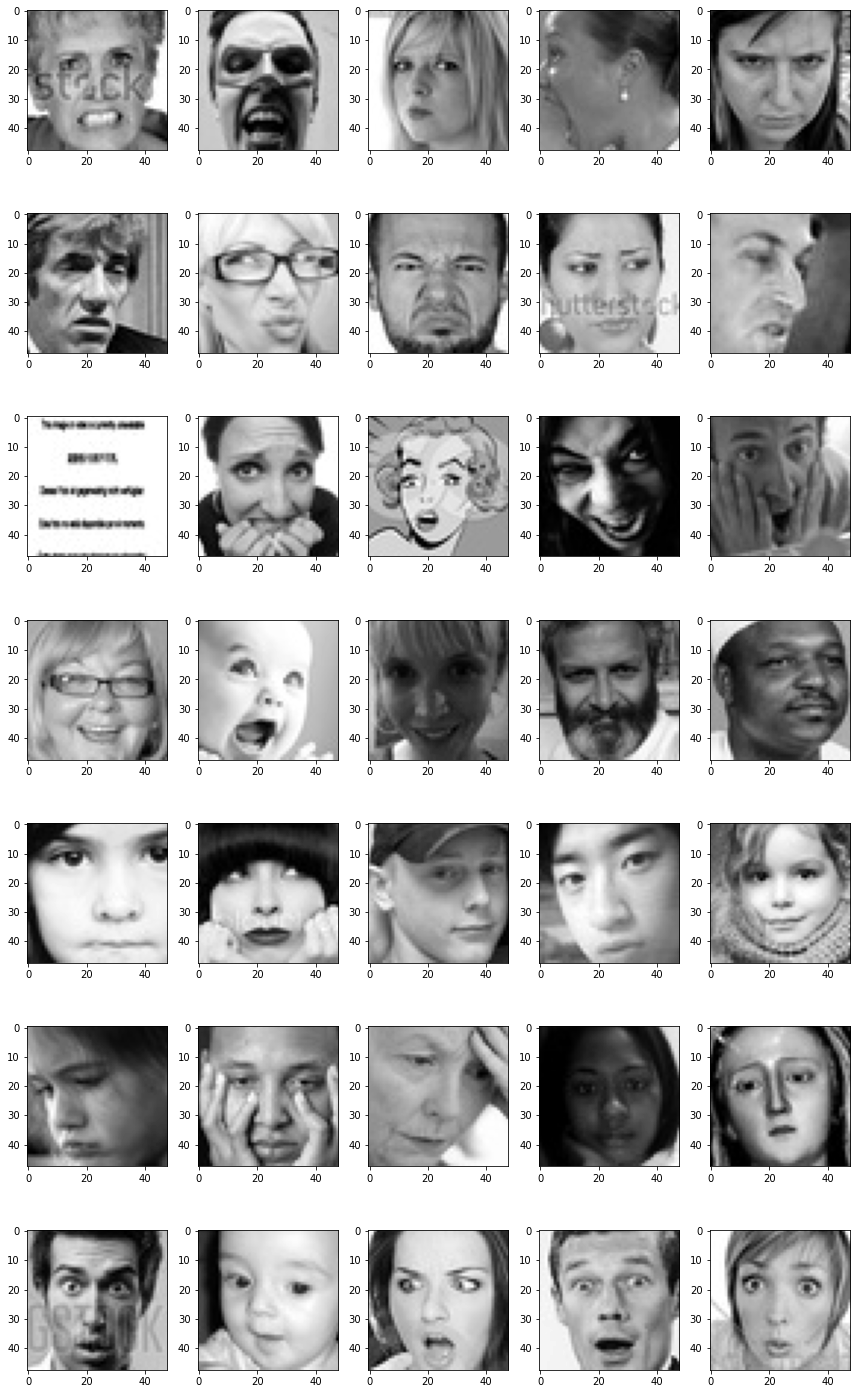

In [13]:
#displaying some of the images and looking for wrong ones

plt.figure(0, figsize=(12,20))
fig_no = 0
for expression in os.listdir("train/"):
    print(expression)
    for i in range(7,12):
        fig_no = fig_no + 1
        plt.subplot(7,5,fig_no)
        print("train/" + expression + "/" +os.listdir("train/" + expression)[i])
        img = plt.imread("train/" + expression + "/" +os.listdir("train/" + expression)[i])
        plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()

# Local Binary Patterns (LBP) 
https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

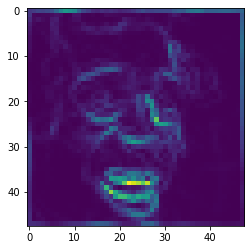

In [3]:
import skimage.feature
import numpy
import matplotlib.pyplot as plt
img = plt.imread("train/happy/Training_10046809.jpg")
img = skimage.feature.local_binary_pattern(img, 8,1.0,method='var')
plt.imshow(img)
plt.show()
#testing the LBP on an image, we see how the edges are the main piece of information/feature extracted

# KNN using the LBP histograms to compute distances between instances
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# We need a function that outputs the LBP Patterns histogram instead of the image

That's why we create the LocalBinaryPatterns class

In [20]:
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist


# Creating the dataset of features and the KNN model

In [45]:
#create the dataset with the features extractor: compute the LBP for every image => 16 blocs6 histograms of 256 vals
# compute the distances between objects: euclidian


#Let's create the training data histograms
#imgs
#label_list
X = []
#here we used var as the method for LBP
desc = LocalBinaryPatterns(32, 4)

#Compute the LPB,they images, I'd like to get histograms 
for img in imgs:
    hist = desc.describe(img)
    X.append(hist)
    
X_np=np.array(X)
X_np.shape 

#first use of the model
#clf = KNeighborsClassifier(n_neighbors)
#clf.fit(X, label_list)




(28708, 34)

In [36]:
# [0 'angry', 1'disgust', 2'fear', 3'happy', 4'neutral', 5'sad', 6'surprise']
n_neighbors = 5
#first use of the model
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_np, label_list)
#This are basic results (100 for each emotion) we get when fiting the model with the following parameters: 
label = 0
#test number
n = 100
for expression in os.listdir("test/"):
    score=0
    print(expression)
    for i in range(1,n):
        img = plt.imread("test/" + expression + "/" +os.listdir("test/" + expression)[i])
        histtest = desc.describe(img)
        output = clf.predict(histtest.reshape(1, -1))
        #print(output, end =" ") 
        if label== output[0]:
            score +=1
    label +=1
    print(score/n)

        
        

angry
0.25
disgust
0.12
fear
0.16
happy
0.24
neutral
0.19
sad
0.12
surprise
0.14


LBP using the var method doesn't give good result so we use the uniform value after this point

In [30]:

#get the test dataset:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

tests=[] #save tests
tests_Y = [] #save labels
path = "test/"
folders=os.listdir(path)

for i in range(len(folders)):
    path_emotion=path+folders[i]
    filenames=sorted(os.listdir(path_emotion))      
    #print("..................")
    #print(filenames)
    for j in range(len(filenames)):
        tests_Y.append(i)
        img=plt.imread(path_emotion+"/"+filenames[j])
        tests.append(img)
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 23:06:29
Current Time = 23:06:33


In [46]:
#creating the extracted features for the testing dataset:

test_X = []
for img in tests:
    hist = desc.describe(img)
    test_X.append(hist)
X_testnp = np.array(test_X)
X_testnp.shape


(7178, 34)

best results so far: Hyperparameters: LPB(32, 4) using uniform  ,6 neighbours (log, weight = distance)
angry
0.24
disgust
0.35
fear
0.24
happy
0.4
neutral
0.3
sad
0.24
surprise
0.39

pure random would be 1/7 ==> 0.14 for each class
Let's see if we can fit the hyperparameters to get better results.
We know that the maximum precision we can get with such a simple model is 0.6 (0.4 is already a good result here)

We decide to see if the model could potentially overfit the data:
angry 0.99
disgust 0.98
fear 0.99
happy 0.99
neutral 0.99
sad 0.99
surprise 0.99

These are the results on the test set, we clearly see overfitting, although it's obvious with such a model
Let's check how we can chose a better k number;
Let's see how it goes with k = 5
angry
0.28
disgust
0.34
fear
0.26
happy
0.38
neutral
0.28
sad
0.2
surprise
0.38

With k = 4
angry
0.31
disgust
0.36
fear
0.24
happy
0.38
neutral
0.25
sad
0.21
surprise
0.42

we see how K can influence the results of the model, let's run a broader experience on this parameter

In [51]:
test_Ynp = np.array(tests_Y)
Pred_y = neigh.predict(X_testnp)
print("Accuracy of model at K=4 is",metrics.accuracy_score(tests_Y, Pred_y))

Accuracy of model at K=4 is 0.30913903594315967


# Let's monitor the K (number of neighbours) influence on the model

Minimum error:- 0.6726107550849819 at K = 43


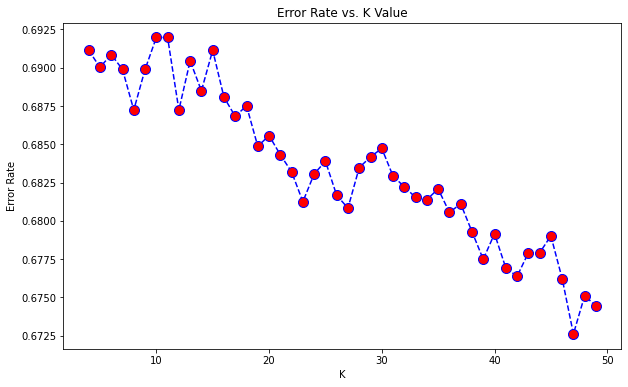

In [60]:

# Let's see the K influence
error_rate = []
for k in range(4,50):
    n_neighbors = k
    clf = KNeighborsClassifier(n_neighbors,weights = "distance")
    clf.fit(X_np, label_list)

    #testing:
    Pred_y = clf.predict(X_testnp)
    #print("Accuracy of model at K= "+str(n_neighbors)+ " is",metrics.accuracy_score(tests_Y, Pred_y))
    error_rate.append(np.mean(Pred_y != tests_Y))
    
plt.figure(figsize=(10,6))
plt.plot(range(4,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


changes on K
Accuracy of model at K= 4 is 0.30886040679855115
Accuracy of model at K= 5 is 0.30997492337698523
Accuracy of model at K= 6 is 0.30913903594315967
Accuracy of model at K= 7 is 0.3101142379492895
Accuracy of model at K= 8 is 0.3127612148230705
Accuracy of model at K= 9 is 0.3101142379492895
Accuracy of model at K= 10 is 0.3080245193647255
Accuracy of model at K= 11 is 0.3080245193647255
Accuracy of model at K= 12 is 0.3127612148230705
Accuracy of model at K= 13 is 0.30955697966007245
Accuracy of model at K= 14 is 0.3115073836723321
Accuracy of model at K= 15 is 0.30886040679855115
Accuracy of model at K= 16 is 0.3119253273892449
Accuracy of model at K= 17 is 0.3131791585399833
Accuracy of model at K= 18 is 0.312482585678462
Accuracy of model at K= 19 is 0.31512956255224295


We can see how the increasing of the K value decreases the error Rate but the results are still very low, we only decrease the loss by 2%.
But it is generally known that the theoretical optimal K value is roughly the square root of the number of instances in the dataset so about 169 for this model (28709 samples here)
We get the following:

 # Accuracy of model at K= 169 is 0.33017553636110336
 It's still close to the 0.3275 we had at K = 46
 
 Let's see how a higher value of K influence the model: K=200

In [66]:
n_neighbors = 200 #Let's see how it evolves if we take a higher value of K
clf = KNeighborsClassifier(n_neighbors,weights = "distance")
clf.fit(X_np, label_list)

#testing:
Pred_y = clf.predict(X_testnp)
print("Accuracy of model at K= "+str(n_neighbors)+ " is",metrics.accuracy_score(tests_Y, Pred_y))

Accuracy of model at K= 200 is 0.32850376149345223


We can conclude that the model is too simple to work on this task as we cannot get better accuracy than 0.33 although we carfully looked at the dataset provided. Still it is quite obvious that such a model would not get great results as human emotion is hard to tell even from us and the images in the dataset were quite low in resolution and the feature extractor was very basic. That's why we don't try to push further into hyperparameters analysis, as we used the best parameters on both the feature extractor (32 points and r=4)  and the model(euclidian and distance as weights, optimal value for K)
An intereting point to note is that expressions such as sad and neutral are the hardest to tell for the model (this comes from the feature extractor that works mainly on particular edges). That's why the Surprise and Digust always get better results than more neutral expressions. 

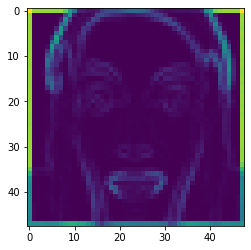

In [12]:
#Let's display the features of a Surprise and a sad/neutral image to see the difference of exctracted features:
img = plt.imread("train/surprise/Training_1002457.jpg")
img = skimage.feature.local_binary_pattern(img, 8,1.0,method='var')
plt.imshow(img)
plt.show()

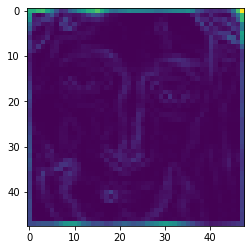

In [13]:
img = plt.imread("train/sad/Training_10091569.jpg")
img = skimage.feature.local_binary_pattern(img, 8,1.0,method='var')
plt.imshow(img)
plt.show()

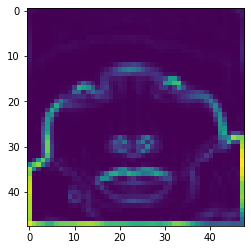

In [8]:
img = plt.imread("train/neutral/Training_10088257.jpg")
img = skimage.feature.local_binary_pattern(img, 8,1.0,method='var')
plt.imshow(img)
plt.show()

We can see here how the neutral and sad face extracted features don't mean much about the expression of the person, wheras surprise has specific features: round mouth and round eyes for instance

CNN could give better results than such as simple model so that's the direction we woud take instead of trying to endlessly optimize this model for such low accuracy